<a href="https://colab.research.google.com/github/ricardodeazambuja/colab_utils/blob/master/Testing_colab_utils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

More details read the post on my blog:  
https://ricardodeazambuja.com/

A lot of inspiration for the stuff presented here came from:  
https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb

In [1]:
!pip install git+git://github.com/ricardodeazambuja/colab_utils.git

  Cloning git://github.com/ricardodeazambuja/colab_utils.git to /tmp/pip-req-build-x7s9r6gz
  Running command git clone -q git://github.com/ricardodeazambuja/colab_utils.git /tmp/pip-req-build-x7s9r6gz
  Created wheel for Colab-Utils: filename=Colab_Utils-0.1-cp36-none-any.whl size=17417 sha256=3f84b1b431217c84ef0a68575b4600d798fe8d35f4713fbf18cc0a47198694d3
  Stored in directory: /tmp/pip-ephem-wheel-cache-jrph9fj_/wheels/21/75/32/38aeb76b2424385f43eae9fd28c98e084308f4f6d9cb0a4f97
Successfully built Colab-Utils


In [0]:
from colab_utils import webcam2numpy, labelImage, getAudio

In [6]:
img = webcam2numpy()


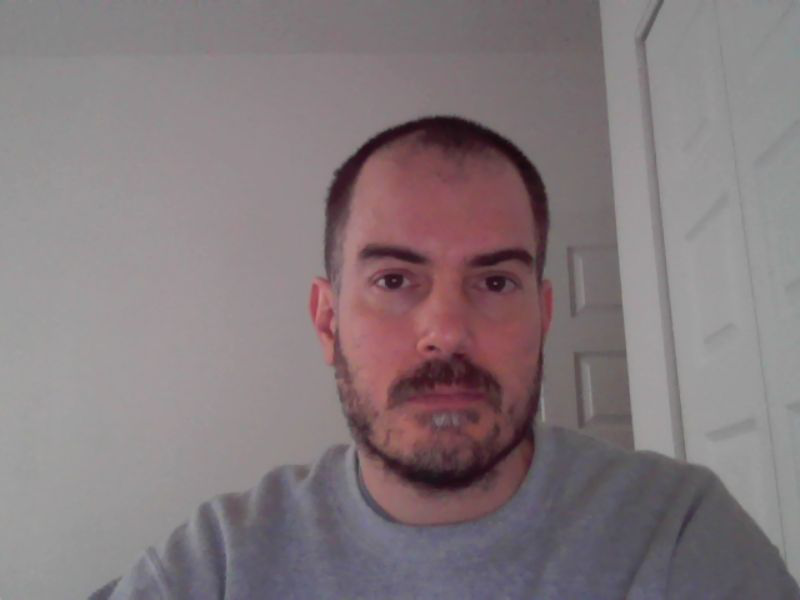

<IPython.core.display.Javascript object>

And here are the annotations: 
 [[[367, 272, 65, 32], 'eye'], [[412, 318, 80, 50], 'nose'], [[306, 271, 45, 116], 'ear']]


In [8]:
annotations = labelImage(img)
print(f"And here are the annotations: \n {annotations}")

In [9]:
audio, sr = getAudio()

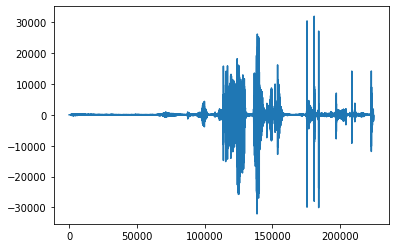

In [10]:
import matplotlib.pyplot as plt
plt.plot(audio)
plt.show()